# Global Power Plant Database

Problem Statement: Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. Prediction : Make two prediction for labels

1) Primary Fuel 2) capacity_mw

In [1]:
# Importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [3]:
# Checking total no.of rows and columns in dataset.

data.shape

(907, 27)

There are tital 907 rows and 27 columns

In [4]:
# Checking the data summary.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are total 15 float and 12 object data type columns.

In [5]:
# Checking the data type columns.

data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are total 15 float and 12 object data type columns

In [6]:
# Checking the columns in dataset.

data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

The dataset has 907 rows and 27 columns

In [7]:
# Checking the null values in dataset.

data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see there are very high no. of null values in our dataset.

In [8]:
# Checking the unnique values.

data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

country,country_long,other_fuel2,year_of_capacity_data,generation_data_source has unique value 1, and other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh has zero unique valuethat means it has NAN values, so we can drop that columns.

In [9]:
# Checking the count of the country.

data["country"].value_counts()

IND    907
Name: country, dtype: int64

In [10]:
# Checking the count of the country_long.

data["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

Here after getting total value counts of above two column we found that it only contains IND and India values so we will drop them as we don't need it for model prediction.

In [11]:
# Checking the count of other_fuel2.

data["other_fuel2"].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [12]:
# Checking the count of other_fuel3.

data["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [13]:
# Checking the count of year_of_capacity_data.

data["year_of_capacity_data"].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [14]:
# Checking the count of generation_data_source.

data["generation_data_source"].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [15]:
# Checking the count of wepp_id.

data["wepp_id"].value_counts()

Series([], Name: wepp_id, dtype: int64)

In [16]:
# Checking the count of generation_gwh_2013.

data["generation_gwh_2013"].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

In [17]:
# Checking the count of generation_gwh_2019.

data["generation_gwh_2019"].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

In [18]:
# Checking the count of generation_gwh_2019.

data["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [19]:
# Checking the count of generation_gwh_2019.

data["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [20]:
# Checking the count of gppd_idnr
data["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [21]:
# Checking the count of owner.

data["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [22]:
data.drop(columns=['country','country_long','other_fuel2','other_fuel3','year_of_capacity_data','generation_data_source','wepp_id','generation_gwh_2013','generation_gwh_2019','name','url','owner','gppd_idnr','estimated_generation_gwh'],inplace=True)

In [23]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [24]:
# Checking the dataset after dropping some columns.

data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [25]:
# Checking dataset shape after dropping some columns.

data.shape

(907, 13)

In [26]:
# Checking the null values again after dropping irrelevent columns.

data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

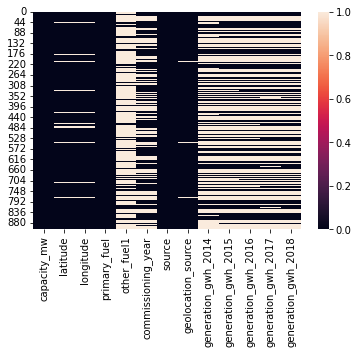

In [27]:
# Visualizing null values using heatmap.

sns.heatmap(data.isnull())

Here we see that our dataset has null values.

In [28]:
# We will handle null values using median imputation for numerical columns and mode imputation for categorical columns.

data["latitude"] = data["latitude"].fillna(data["latitude"].mean())
data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])
data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])
data["longitude"] = data["longitude"].fillna(data["longitude"].median())
data["commissioning_year"] = data["commissioning_year"].fillna(data["commissioning_year"].median())
data["generation_gwh_2014"] = data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].median())
data["generation_gwh_2015"] = data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].median())
data["generation_gwh_2016"] = data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].median())
data["generation_gwh_2017"] = data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].median())
data["generation_gwh_2018"] = data["generation_gwh_2018"].fillna(data["generation_gwh_2018"].median())

In [29]:
# Now let's check the null values.

data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

We successfully handled the missing values.

In [30]:
# Let's check some other columns for model prediction.

data['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [31]:
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [32]:
# Checking the list of counts of commissioning_year
data['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

As we have generation_growth upto 2018 so we will substract commissioning year column values from 2018 to get the new column life_span and we can drop commisioning year column.

In [33]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
data["life_span"] = 2018 - data["commissioning_year"]
data.drop(columns=["commissioning_year"], inplace = True)

In [34]:
# Let's check dataset after dropping commissioning_year column and including life_span column.

data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


In [35]:
# Checking the dataset columns after adding new column.

data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'life_span'],
      dtype='object')

In [36]:
# Let's check the dataset statistical summary.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
generation_gwh_2014,907.0,1516.689956,2785.604307,0.0000,801.123775,801.123775,801.123775,28127.000
generation_gwh_2015,907.0,1510.071296,2984.994556,0.0000,711.181225,711.181225,711.181225,30539.000
generation_gwh_2016,907.0,1565.361383,3005.087210,0.0000,737.205450,737.205450,737.205450,30015.000
generation_gwh_2017,907.0,1657.121797,3046.862910,0.0000,817.977250,817.977250,817.977250,35116.000
generation_gwh_2018,907.0,1665.011030,3168.826750,0.0000,751.644375,751.644375,751.644375,35136.000
life_span,907.0,19.271224,13.158621,0.0000,15.000000,17.000000,20.000000,91.000


Here in statistical summary of dataset we see that total count of data is 907,maximum value is 4760,minimum value is 0,and also we can see vast difference in mean and standard deviation, because of this huge difference there must be outliers in dataset, we will handle them further.

# Exploratory Data Analysis(EDA)

# Univariate Analysis

<AxesSubplot:title={'center':'primary_fuel'}>

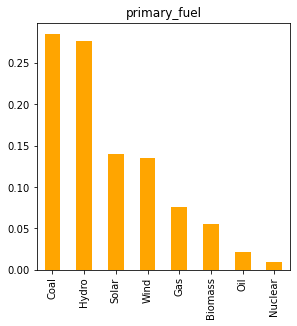

In [37]:
import warnings
warnings.filterwarnings('ignore')

# Visualizing primary_fuel column using countplot.

plt.figure(1)
plt.subplot(222)
data["primary_fuel"].value_counts(normalize='True').plot.bar(figsize=(10,10),title="primary_fuel",color=["orange"])

In the above count plot, coal and hydro fuel types have highest no. of values then solar and wind fuel types and then remaining fuel types.

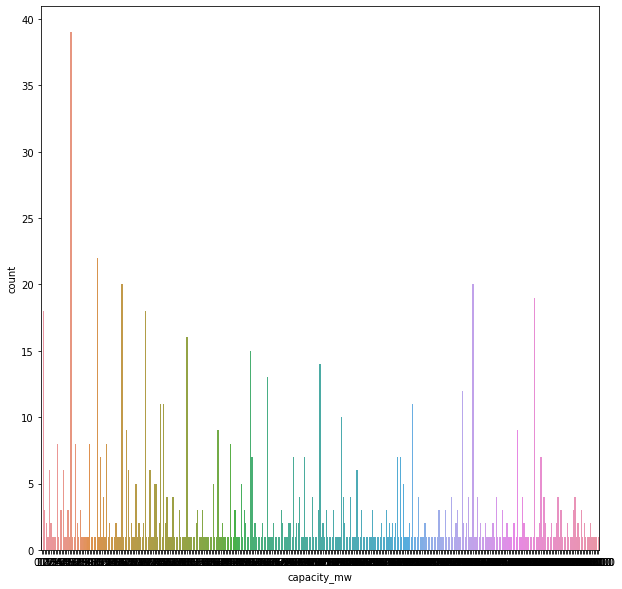

In [38]:
# visualizing the capacity_mw  using countplot.

plt.figure(figsize=(10,10))
sns.countplot(data['capacity_mw'])
plt.show()

Here count and capacity_mw has values increasing respectively.

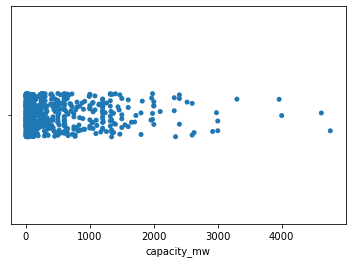

In [39]:
# Visualizing capacity_mw column using strip plot.

plt.figure(1)
sns.stripplot(data["capacity_mw"])
plt.show()

Here we can see that maximum value lies in between 0 to 100 and too much scattered from 3000.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


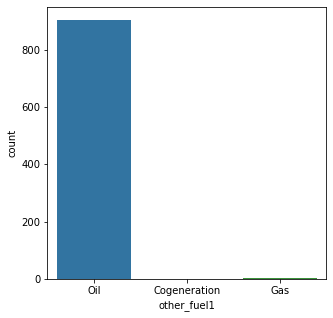

In [40]:
# Visualizing other_fuel1 column using countplot.

print(data['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(data['other_fuel1'])
plt.show()

Here in other_fuel1 column we have three categories and in them oil has maximum no. of values

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


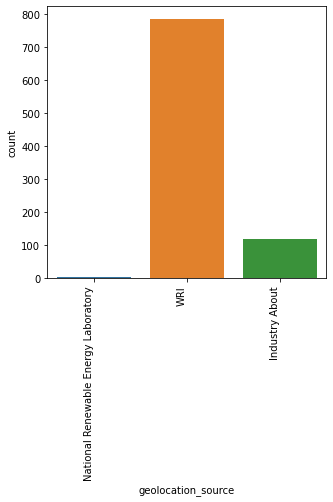

In [41]:
# Visualizing geolocation_source column using count plot.

print(data['geolocation_source'].value_counts())
plt.figure(figsize=(5,5))
plt.xticks(rotation=90,ha='right')
sns.countplot(data['geolocation_source'])
plt.show()

From abovecount plot, maximum information is shared by WRI source.

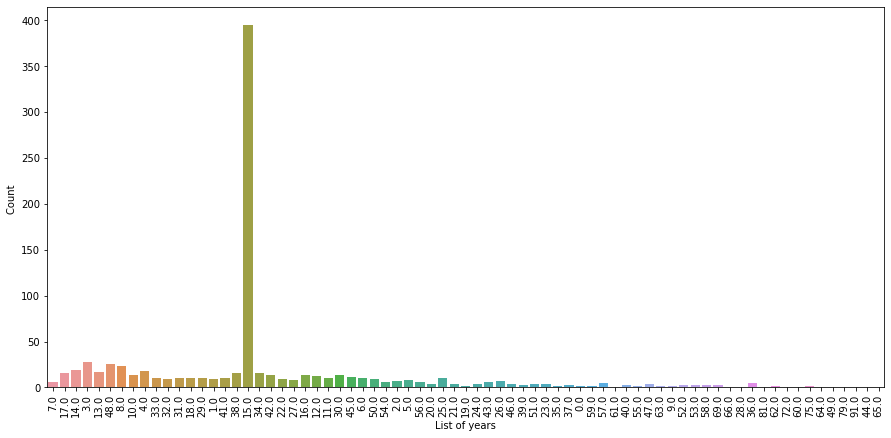

In [42]:
# Visualizing life_span column using count plot.

plt.figure(figsize=(15,7))
values = list(data['life_span'].unique())
diag = sns.countplot(data["life_span"])
diag.set_xticklabels(labels=values, rotation=90)
plt.xlabel("List of years")
plt.ylabel("Count ")
plt.show()

As we imputed commissioning year column with median imputation so maximum row values are occupied by 15.0. 

In [43]:
# Separating numerical columns to see normalizationmin dataset.

numerical=data[['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'life_span']]

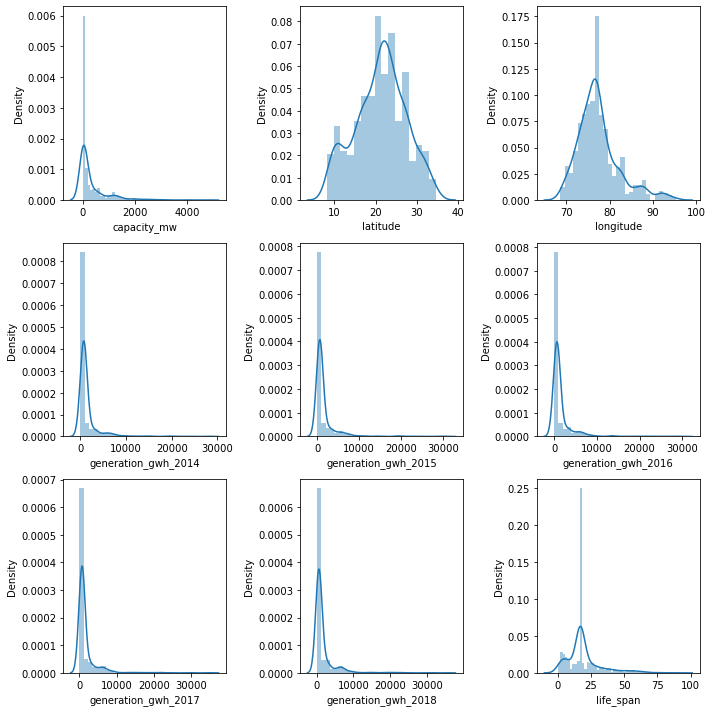

In [44]:
# Visualizing numerical features using dist plot.

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distplot, we can see that the mostly the data is skewed right which means data is not distributed normally.

# Bivariate Analysis 

<AxesSubplot:title={'center':'life_span vs primary_fuel'}, xlabel='primary_fuel', ylabel='life_span'>

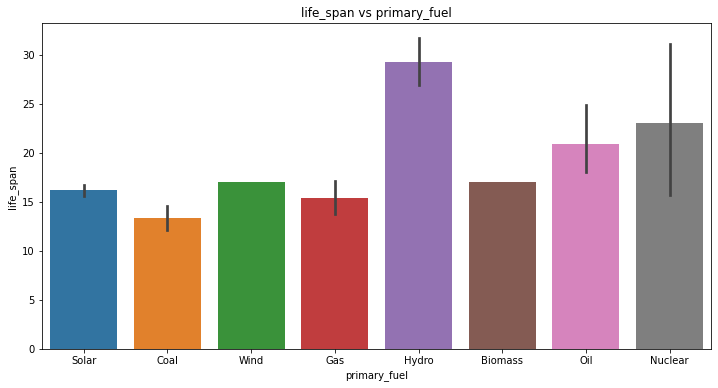

In [45]:
# Visualizing Comparision between life_span and primary_fuel using bar plot.

plt.figure(figsize=[12,6])
plt.title('life_span vs primary_fuel')
sns.barplot(data['primary_fuel'],data["life_span"])

Here primary_fuel type hydro has maximum life_span then nuclear then oil and then all the remaining types.

<AxesSubplot:title={'center':' latitude vs primary_fuel'}, xlabel='primary_fuel', ylabel='latitude'>

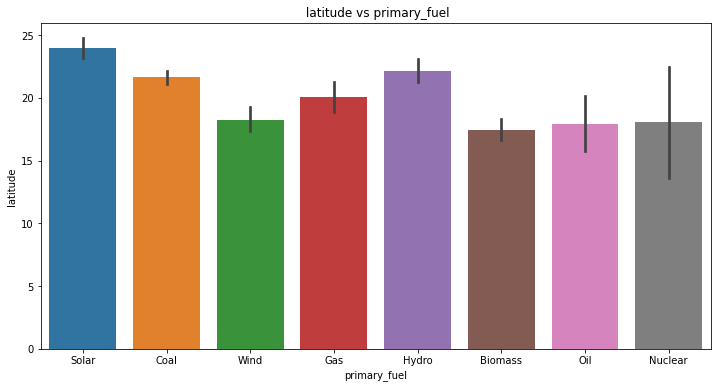

In [46]:
# Visualizing Comparision between latitude and primary_fuel using bar plot.


plt.figure(figsize=[12,6])
plt.title(' latitude vs primary_fuel')
sns.barplot(data['primary_fuel'],data["latitude"])

Primary_fuel type solar has maximum lattitude then hydro, then coal,then gas and so on.

<AxesSubplot:title={'center':' longitude vs primary_fuel'}, xlabel='primary_fuel', ylabel='longitude'>

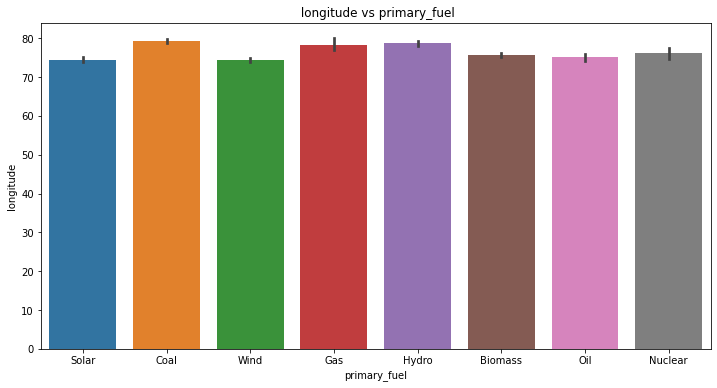

In [47]:
# Visualizing Comparision between longitude and primary_fuel using bar plot.


plt.figure(figsize=[12,6])
plt.title(' longitude vs primary_fuel')
sns.barplot(data['primary_fuel'],data["longitude"])

In above bar plot coal,gas,hydro have almost same lattitude and other such as solar,wind,biomass,oil,nuclear have same.

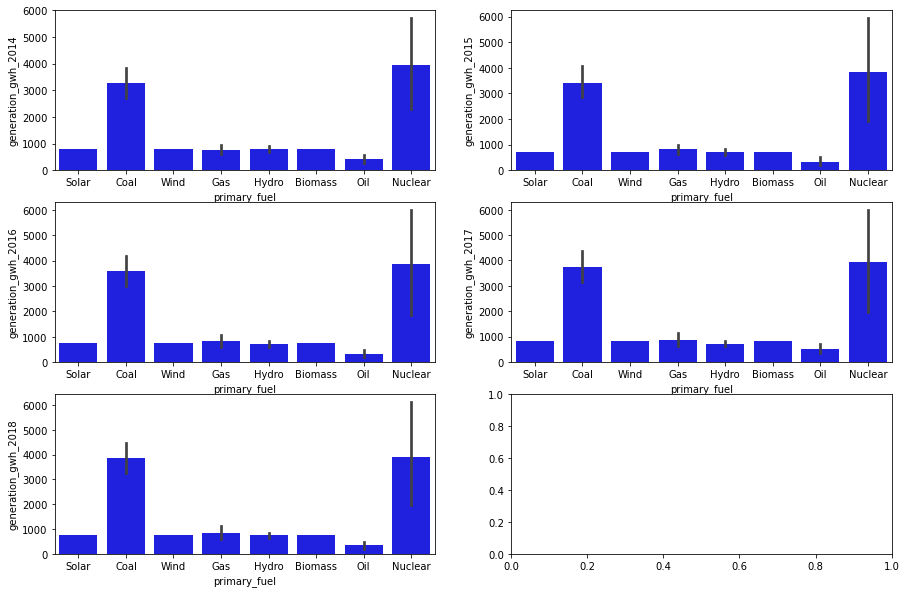

In [48]:
# Visualizing Comparision between generation_gwh_2014,2015,2016,2017,2018 and primary_fuel using bar plot.


fig,axes = plt.subplots(3,2, figsize=[15,10])
sns.barplot(x='primary_fuel', y='generation_gwh_2014', data=data, ax=axes[0,0],color='b')
sns.barplot(x='primary_fuel', y='generation_gwh_2015', data=data, ax=axes[0,1],color='b')
sns.barplot(x='primary_fuel', y='generation_gwh_2016', data=data, ax=axes[1,0],color='b')
sns.barplot(x='primary_fuel', y='generation_gwh_2017', data=data, ax=axes[1,1],color='b')
sns.barplot(x='primary_fuel', y='generation_gwh_2018', data=data, ax=axes[2,0],color='b')
plt.show()

Here in most of years primary_fuel type used are coal and nuclear.

<AxesSubplot:title={'center':' geolocation_source vs capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

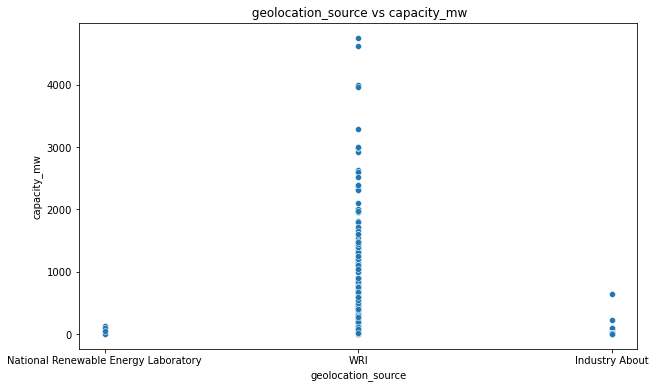

In [49]:
# Checking the relation between target capacity_mw and variable geolocation source.

plt.figure(figsize=[10,6])
plt.title(' geolocation_source vs capacity_mw')
sns.scatterplot(data['geolocation_source'],data["capacity_mw"])

Here maximum geolocation_source used is WRI

<AxesSubplot:title={'center':'life_span vs capacity_mw'}, xlabel='life_span', ylabel='capacity_mw'>

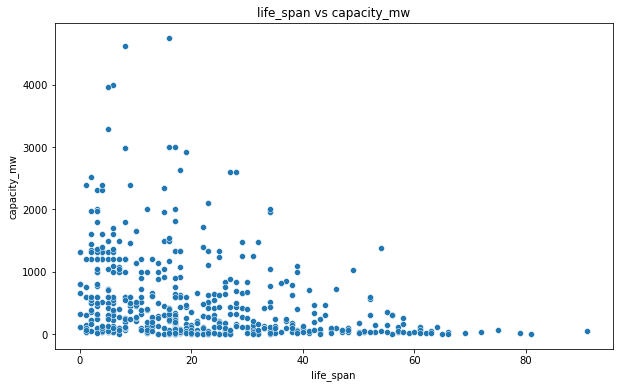

In [50]:
# Checking the relation between life_span and capacity_mw.

plt.figure(figsize=[10,6])
plt.title('life_span vs capacity_mw')
sns.scatterplot(data['life_span'],data["capacity_mw"])

Here data points are mostly shifted in left side,that shows negative corelation.

<AxesSubplot:title={'center':'latitude vs capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

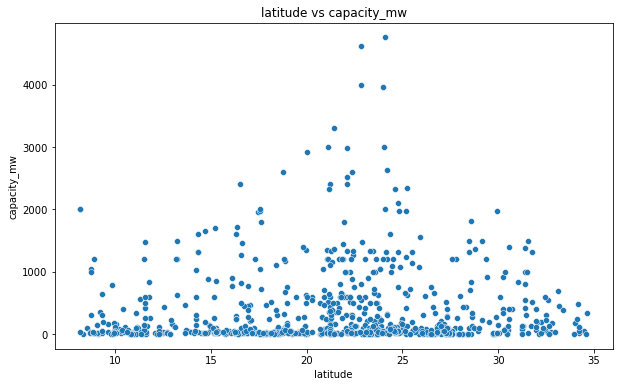

In [51]:
# Checking the relation between latitude and capacity_mw.


plt.figure(figsize=[10,6])
plt.title('latitude vs capacity_mw')
sns.scatterplot(data['latitude'],data["capacity_mw"])

The data points in above scatter plot are mostly spread in middle but dont show any linear relationship.

<AxesSubplot:title={'center':'longitude vs capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

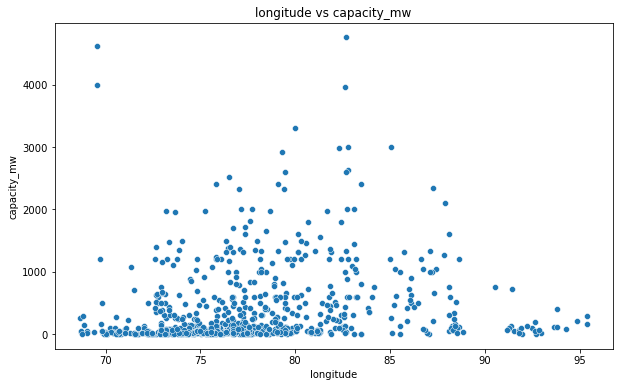

In [52]:
# Checking the relation between longitude and capacity_mw.


plt.figure(figsize=[10,6])
plt.title('longitude vs capacity_mw')
sns.scatterplot(data['longitude'],data["capacity_mw"])

The data points in above scatter plot are mostly spread in middle but dont show any linear relationship.

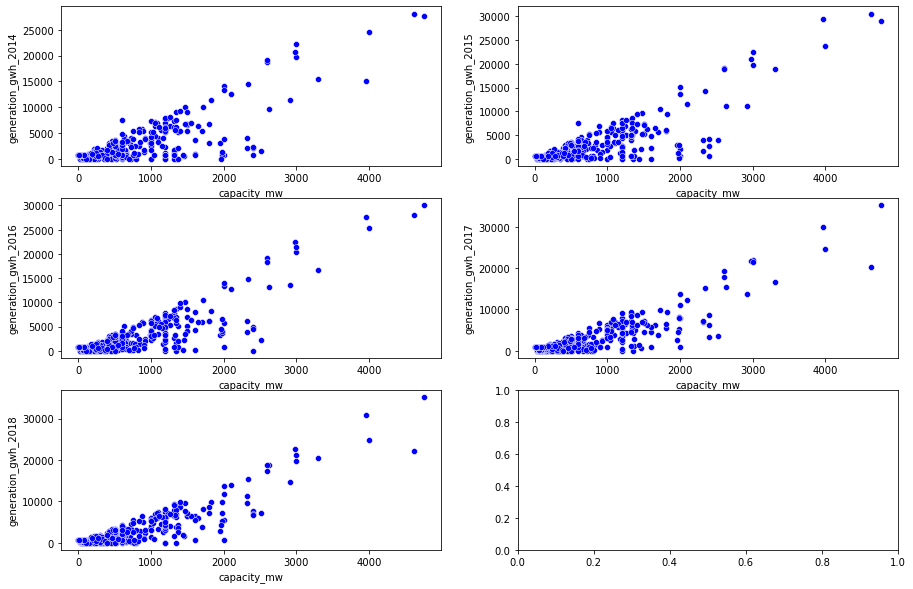

In [53]:
# Visualizing years vs capacity_mw.

fig,axes = plt.subplots(3,2, figsize=[15,10])
sns.scatterplot(x='capacity_mw', y='generation_gwh_2014', data=data, ax=axes[0,0],color='b')
sns.scatterplot(x='capacity_mw', y='generation_gwh_2015', data=data, ax=axes[0,1],color='b')
sns.scatterplot(x='capacity_mw', y='generation_gwh_2016', data=data, ax=axes[1,0],color='b')
sns.scatterplot(x='capacity_mw', y='generation_gwh_2017', data=data, ax=axes[1,1],color='b')
sns.scatterplot(x='capacity_mw', y='generation_gwh_2018', data=data, ax=axes[2,0],color='b')
plt.show()

Here the data points in each year showing some linear relationship that means positive relationship between generartion years and capacity_mw.

<AxesSubplot:title={'center':'capacity_mw and primary_fuel'}, xlabel='primary_fuel', ylabel='capacity_mw'>

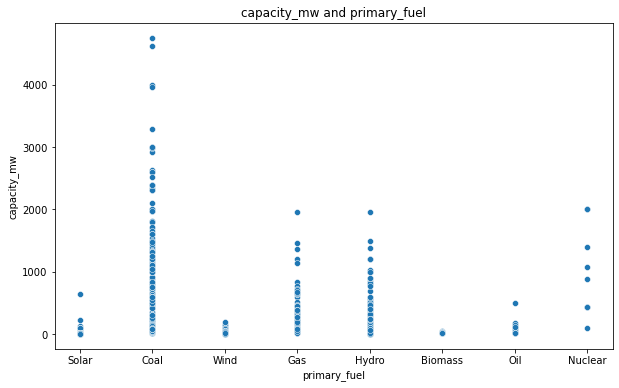

In [54]:
# visualizing the primary_fuel vs capacity_mw using scatter plot.

plt.figure(figsize=[10,6])
plt.title('capacity_mw and primary_fuel')
sns.scatterplot(data['primary_fuel'],data["capacity_mw"])

Here in the above scatter plot, primary_fuel type coal has maximum capacity then Nuclear then all other remaining columns.

<AxesSubplot:title={'center':' capacity and primary_fuel'}, xlabel='primary_fuel', ylabel='capacity_mw'>

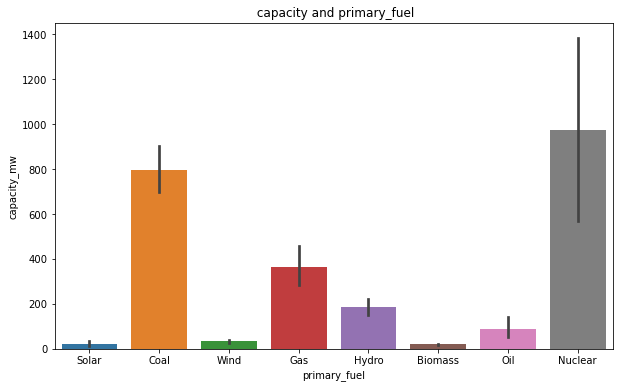

In [55]:
# visualizing the primary_fuel vs capacity_mw using bar plot.


plt.figure(figsize=[10,6])
plt.title(' capacity and primary_fuel')
sns.barplot(data['primary_fuel'],data["capacity_mw"])

# Multivariate Analysis

<Figure size 2880x4320 with 0 Axes>

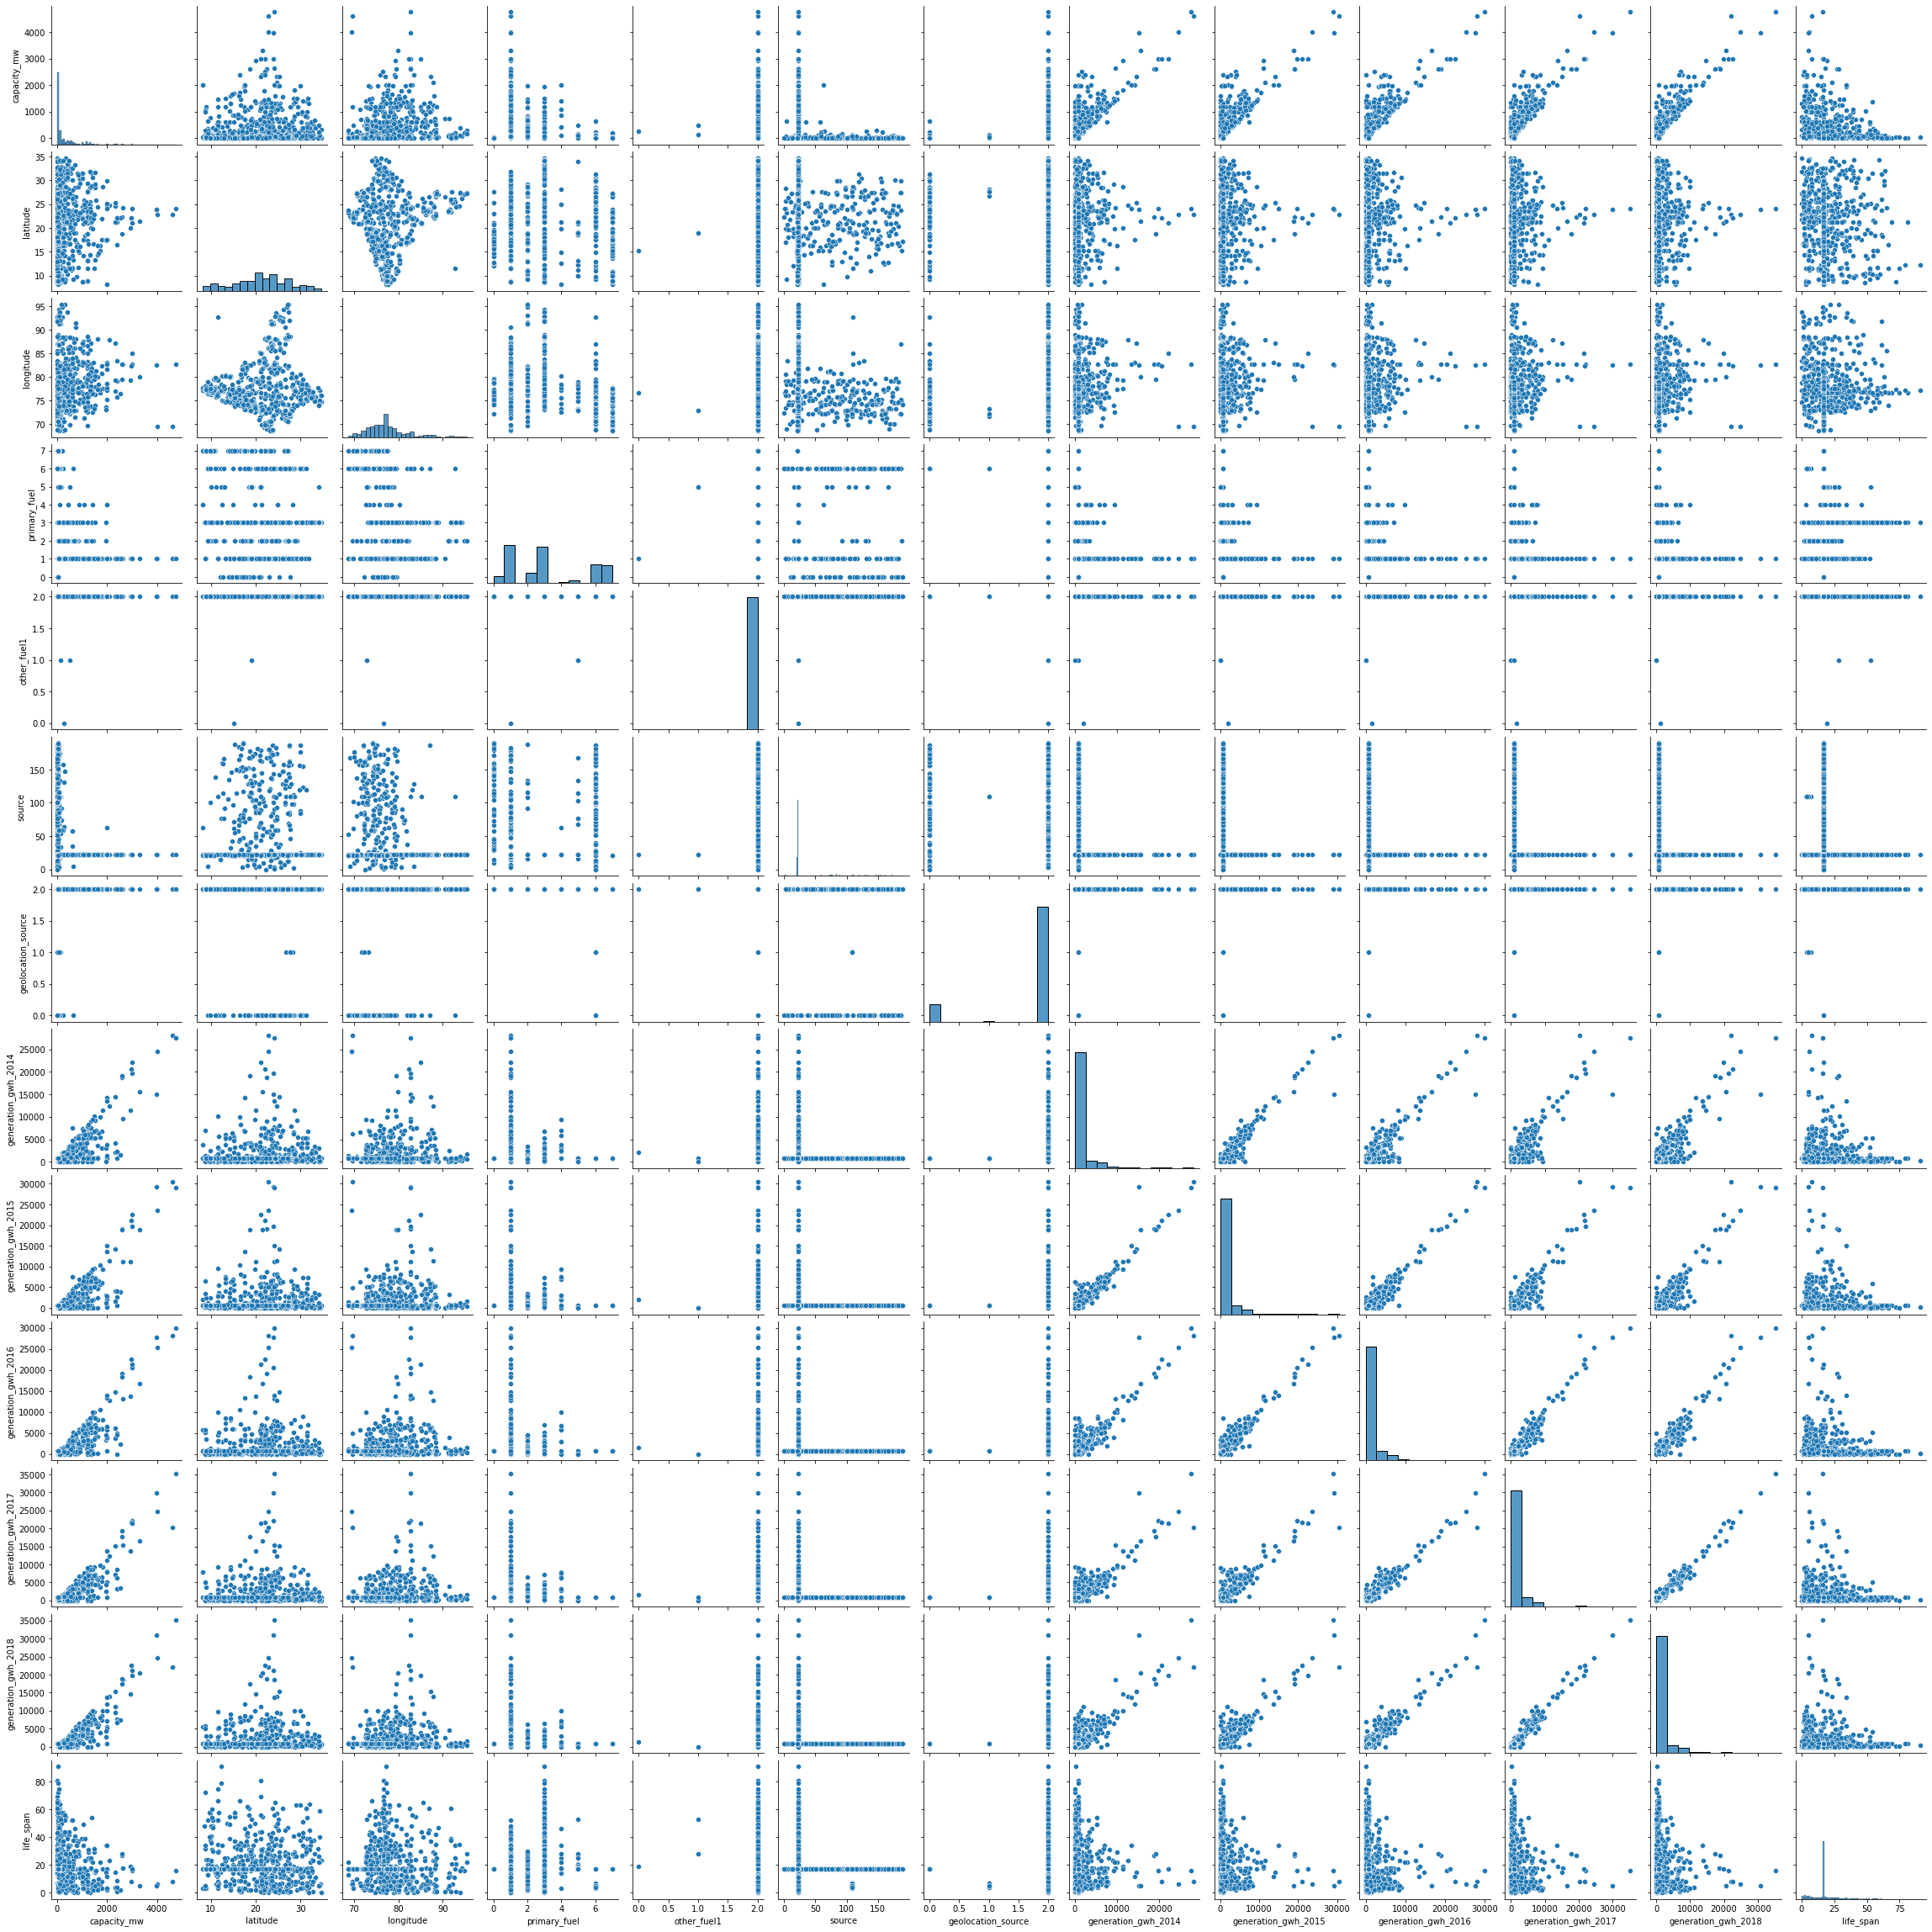

In [76]:
# Visualizing the pairwise relationship between columns.

plt.figure(figsize=(40,40))
sns.pairplot(data)
plt.show()

Here we can see most of the columns shows  linear relationship with each other.

# Let's  encode the categorical columns for model prediction

In [56]:
# Separating columns that needs encoding.

category = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [58]:
from sklearn.preprocessing import LabelEncoder


In [59]:
# Label encoding.

la = LabelEncoder()
data[category]= data[category].apply(la.fit_transform)

In [60]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


We successfully encoded the categorical columns.

# Outlier Detection and Handling

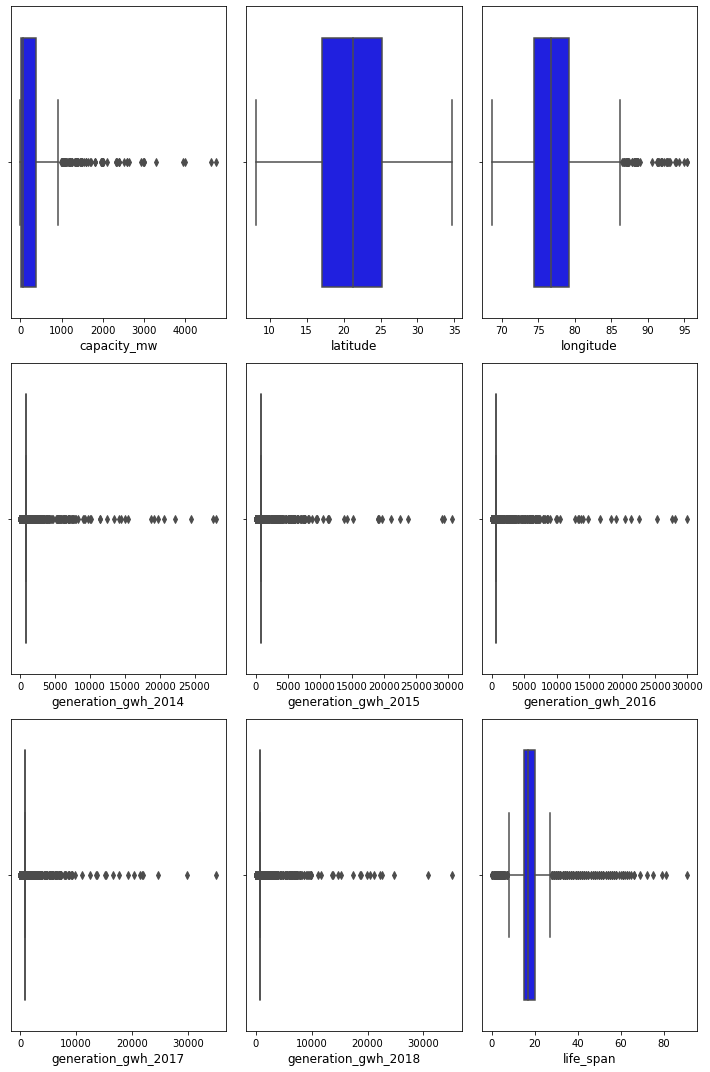

In [61]:
# Visualizing the outliers in dataset using boxplot.

plt.figure(figsize=(10,15))
plotnumber=1
for column in numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Here we can see each column has outliers except latitude and we will handle them using zscore method.

In [65]:
# Separating outliers column for outliers handling.

Outliers=data[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','life_span']]

In [67]:
# Outliers handling.

from scipy.stats import zscore
z=np.abs(zscore(Outliers))
data_new=data[(z<3).all(axis=1)]
data_new.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


We successfully removed the outliers from dataset. 

In [68]:
# Checking the shape of datset after outlier removal.

data_new.shape

(851, 13)

In [69]:
# Shape of original dataset.

data.shape

(907, 13)

In [70]:
# Data loss after outlier removal.
Data_loss=((907-851)/907)*100
Data_loss

6.174200661521499

There is not that much data loss after outlier removal, it is not more than 10%.

Here we got the new dataset after outliers removal and we will further proceed with that.

# Checking the Correlation

In [71]:
data_new.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


<AxesSubplot:>

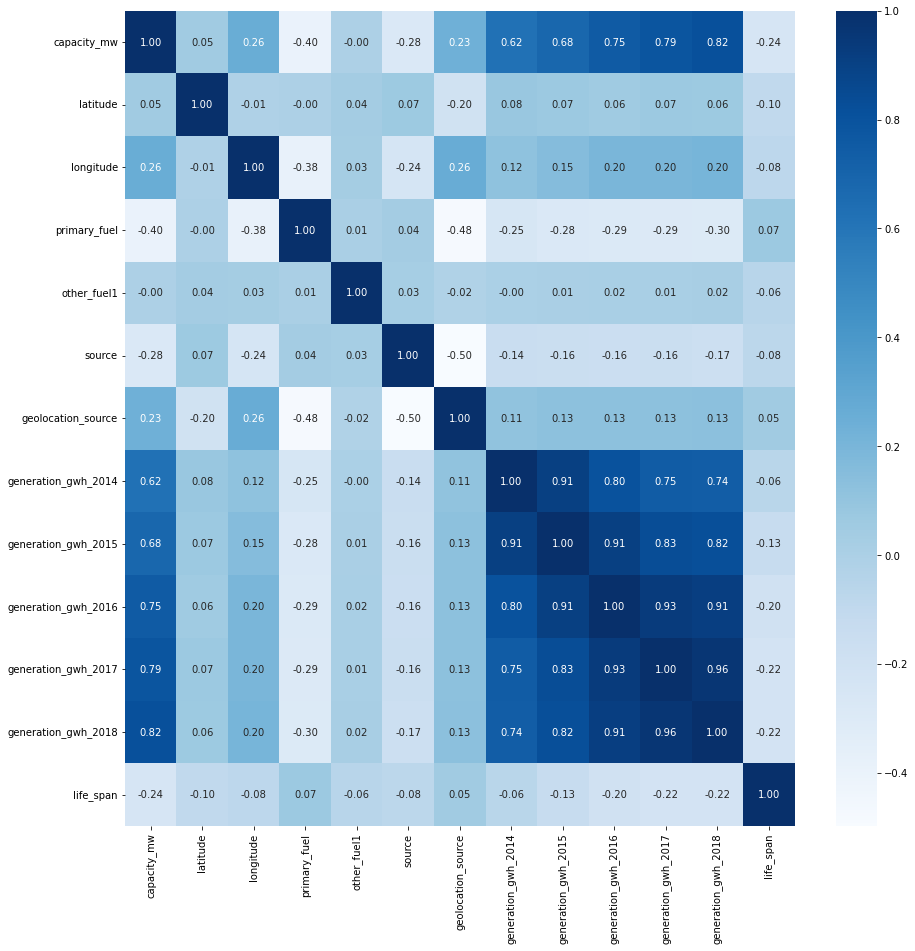

In [75]:
# Visualizing the correlation using heatmap.

plt.figure(figsize=(15,15))
sns.heatmap(data_new.corr(),annot=True,cmap='Blues',fmt='0.2f',linecolor='black')

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

The label Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heatmap we clearly see that most features shows correlation so may be we can face the problem of multi-collinearity,we will check the multi-collinearity using VIF ,before that we will check the skewness in dataset.

# Checking Skewness

In [78]:
data_new.skew().sort_values(ascending=False)

generation_gwh_2014     2.943026
generation_gwh_2015     2.714999
generation_gwh_2016     2.645786
generation_gwh_2018     2.597029
generation_gwh_2017     2.546541
capacity_mw             2.170245
source                  1.734252
life_span               1.280800
longitude               0.945877
primary_fuel            0.413759
latitude               -0.119551
geolocation_source     -2.066536
other_fuel1           -19.809189
dtype: float64

generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2018 ,generation_gwh_2017,capacity_mw, longitude,life_span, source shows most skewness.

In [79]:
# Skewness removal using Powertranform(method='yeo-johnson')

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [85]:
data_new[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','life_span']]=scaler.fit_transform(data_new[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','life_span']])

In [87]:
# Checking the skewness after skewness removal.

data_new.skew().sort_values(ascending=False)

capacity_mw             2.170245
source                  1.734252
primary_fuel            0.413759
life_span               0.052409
longitude               0.000603
generation_gwh_2017    -0.036094
generation_gwh_2014    -0.040049
generation_gwh_2015    -0.048208
generation_gwh_2016    -0.048254
generation_gwh_2018    -0.053122
latitude               -0.119551
geolocation_source     -2.066536
other_fuel1           -19.809189
dtype: float64

Here we successfully removed the skewness in dataset.

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(data_new.values, i) for i in range(data_new.shape[1])]
vif["Features"]=data_new.columns
vif

,vif_Features,Features
0,3.130526,capacity_mw
1,13.877705,latitude
2,1.320434,longitude
3,5.491658,primary_fuel
4,52.720048,other_fuel1
5,3.274671,source
6,13.375184,geolocation_source
7,3.464681,generation_gwh_2014
8,5.894991,generation_gwh_2015
9,9.591781,generation_gwh_2016


Here other_fuel1 column has the highest VIF FACTOR hence lets drop it first for removing Multicollinearity.

In [94]:
# Dropping other_fuel1 column.

x1=data_new.drop('other_fuel1',axis=1)

In [95]:
# Checking the multicollinearity after dropping the other_fuel1 column.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_Features,Features
0,2.865406,capacity_mw
1,8.573106,latitude
2,1.286380,longitude
3,3.202539,primary_fuel
4,2.149998,source
5,5.119992,geolocation_source
6,3.460508,generation_gwh_2014
7,5.893126,generation_gwh_2015
8,9.591766,generation_gwh_2016
9,9.275569,generation_gwh_2017


We can see that after removing the other_fuel1 column, multicollinearity decreases but some  multicollinearity is seen in lattitude column so we will drop it. So finally we have to drop two columns.

In [99]:
# Dropping other_fuel1 and latitude column.

x1=data_new.drop(['latitude','other_fuel1'],axis=1)

In [100]:
# Checking the VIF factor after dropping the columns.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_Features,Features
0,2.715869,capacity_mw
1,1.285327,longitude
2,2.382852,primary_fuel
3,1.662052,source
4,3.235891,geolocation_source
5,3.456908,generation_gwh_2014
6,5.890236,generation_gwh_2015
7,9.573922,generation_gwh_2016
8,9.248437,generation_gwh_2017
9,8.632050,generation_gwh_2018


We finally removed the multicollinearity.

In [101]:
# Dropping the other_fuel1 and latitude column from data_new dataset for model prediction.

data_new.drop(['other_fuel1','latitude'],axis=1,inplace=True)

In [102]:
data_new.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,2.5,-0.922017,6,109,1,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,-1.081027
1,98.0,-0.499918,1,174,2,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,0.045032
2,39.2,-2.377242,7,21,2,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,0.045032
3,135.0,2.431133,2,22,2,-0.249076,0.114643,0.125811,-0.183330,-0.175600,-0.246867
4,1800.0,1.262067,1,22,2,1.402492,2.209237,2.202688,1.935643,2.269543,-1.755925


In [103]:
data_new.shape

(851, 11)

# We will separate the 'capacity_mw' target and feature columns 


In [158]:
# x=features,y=target

x=data_new.drop('capacity_mw',axis=1)
y=data_new['capacity_mw']

In [159]:
x.shape

(851, 10)

In [160]:
y.shape

(851,)

In [161]:
# Scalling the data using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,-0.922017,1.175506,1.397951,-1.036523,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,-1.081027
1,-0.499918,-0.975797,2.821796,0.407145,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,0.045032
2,-2.377242,1.605767,-0.529717,0.407145,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,0.045032
3,2.431133,-0.545536,-0.507812,0.407145,-0.249076,0.114643,0.125811,-0.183330,-0.175600,-0.246867
4,1.262067,-0.975797,-0.507812,0.407145,1.402492,2.209237,2.202688,1.935643,2.269543,-1.755925
...,...,...,...,...,...,...,...,...,...,...
846,0.231811,-0.975797,-0.507812,0.407145,-0.021192,-2.566106,-0.841109,0.028467,-0.106779,-1.977690
847,0.421491,1.175506,0.696980,-2.480190,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,0.045032
848,-0.224521,1.605767,-0.529717,0.407145,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,0.045032
849,-0.760666,-0.975797,0.302685,0.407145,-0.021192,-0.028353,-0.025970,-0.017684,-0.037438,0.045032


In [162]:
# Checking the VIF factor again begore modep prediction.

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.309989,longitude
1,1.676946,primary_fuel
2,1.501613,source
3,1.874900,geolocation_source
4,3.456341,generation_gwh_2014
5,5.868300,generation_gwh_2015
6,9.570086,generation_gwh_2016
7,9.116060,generation_gwh_2017
8,8.527713,generation_gwh_2018
9,1.098924,life_span


There is no multicollinearity in dataset.

In [163]:
# Checking the best random state using Randomforest regressor.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [188]:
# Concluding Random_state for test_size 0.20.

from sklearn.ensemble import RandomForestRegressor

maxAccu=0
maxRS=0
for i in range(0,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    pred_rf=rf.predict(x_test)
    acc=r2_score(y_test,pred_rf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8847381805582157 Random_State 111


We got the best R2_score for best random state as 111 at test_size 0.20

In [189]:
# Splitting the dataset into train and test at random_state 111 with test_size 0.20

x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=111)

In [190]:
# Importing all necessary libraries.

from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [191]:
# Defining a funtion to get all regressors.

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=51)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)


# Linear Regression

In [192]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 267.7917708958292
R2 Score is: 60.464596792455325
Cross Validation Score is: 53.18750846585626
R2 Score - Cross Validation Score is 7.277088326599063


# Support Vector Regressor

In [193]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 323.2295278654039
R2 Score is: 42.40115516080404
Cross Validation Score is: 41.4878392643298
R2 Score - Cross Validation Score is 0.9133158964742378


# Decision Tree Regressor

In [195]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 227.54504210398792
R2 Score is: 71.45523496859096
Cross Validation Score is: 60.09648198725783
R2 Score - Cross Validation Score is 11.358752981333126


# Random Forest Regressor

In [196]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 177.24047431440056
R2 Score is: 82.68121084239205
Cross Validation Score is: 78.40441836056429
R2 Score - Cross Validation Score is 4.276792481827755


# KNeighbors Regressor

In [197]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 214.8829949892155
R2 Score is: 74.54366867725277
Cross Validation Score is: 72.3563968376337
R2 Score - Cross Validation Score is 2.187271839619072


# ExtraTrees Regressor

In [198]:
model=ExtraTreesRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 183.58085769197095
R2 Score is: 81.41996588744607
Cross Validation Score is: 79.510816302138
R2 Score - Cross Validation Score is 1.9091495853080716


Comparing all above algorithms, the Extra Trees Regressor gives the best results as the difference between R2 Score & Cross Validation Score are least along with least difference in Cross Validation Score and the highest R2 score as compared to all other  models.

Thats why we are choosing ExtraTreesRegressor as our best fit model and we will do hyperparameter tunning for it.

# Hyper parameter tunning

In [199]:
# We will do hyper parameter tunning using gridsearchCV.

GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=10)

In [200]:
# Model training

GCV.fit(x_train,y_train) 

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 8, 12, 16, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [201]:
# Getting the best parameters

GCV.best_params_ 

{'criterion': 'absolute_error',
 'max_depth': 20,
 'max_features': 'auto',
 'n_jobs': 5}

In [202]:
# Predicting the final model wusing best parameters.

finalize = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'auto', n_jobs = 5, max_depth=20)
fit_model= finalize.fit(x_train,y_train)
pred_model=finalize.predict(x_test)

In [203]:
# Checking the final model's R2 score.

final_r2=r2_score(y_test,pred_model,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", final_r2)

R2 score for the Best Model is: 88.05724060608202


In [204]:
# Checking the final model's Cross validation score.


final_cv_score = (cross_val_score(finalize, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 78.73115108433282


In [205]:
# Checking the final model's Root mean square error score.


final_rmse = mean_squared_error(y_test, pred_model, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 150.90956747589155


 Visualizing the finalize model predicted values.

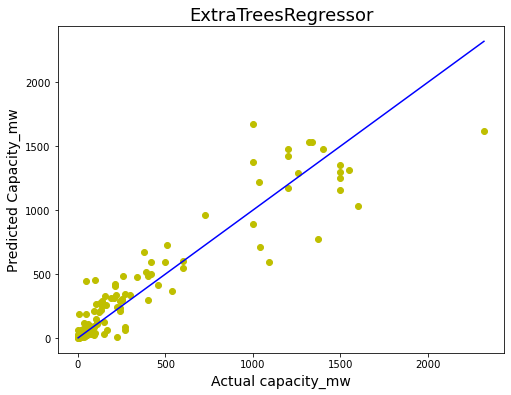

In [209]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_model, color='y')
plt1 = max(max(pred_model), max(y_test))
plt2 = min(min(pred_model), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual capacity_mw', fontsize=14)
plt.ylabel('Predicted Capacity_mw', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Hence after Hyper Parameter Tuningwe got final model with best r2_score as 88.0572% and CV score as 79.4% and lowest Root Mean Square Error as 150.9095.



# Saving the model

In [ ]:
import pickle
filename = 'Global_Power_Plant_ project(Capacity_mw).pkl'
pickle.dump(finalize, open(filename, 'wb'))

# We will separate the 'primary_fuel' target and feature columns

In [210]:
# x=Features, y=Target

x=data_new.drop('primary_fuel',axis=1)
y=data_new['primary_fuel']

In [211]:
# Checking the shape of feature columns

x.shape

(851, 10)

In [224]:
x

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,-1.701898,-0.922017,1.397951,-1.036523,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,-1.081020
1,0.233905,-0.499918,2.821796,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
2,-0.261274,-2.377241,-0.529717,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
3,0.403486,2.431134,-0.507812,0.407145,-0.248311,0.115295,0.126395,-0.182844,-0.175070,-0.246886
4,1.706512,1.262067,-0.507812,0.407145,1.401471,2.206732,2.200474,1.934237,2.267368,-1.755881
...,...,...,...,...,...,...,...,...,...,...
846,1.649790,0.231811,-0.507812,0.407145,-0.020355,-2.569453,-0.841019,0.028976,-0.106235,-1.977631
847,-1.619557,0.421491,0.696980,-2.480190,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
848,-0.497268,-0.224521,-0.529717,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
849,0.125480,-0.760666,0.302685,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011


In [212]:
# Checking the shape of target column.

y.shape

(851,)

In [225]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 851, dtype: int32

In [213]:
# Let's check the skewness again for primary fuel prediction.

x.skew()

capacity_mw            2.170245
longitude              0.000603
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014   -0.040049
generation_gwh_2015   -0.048208
generation_gwh_2016   -0.048254
generation_gwh_2017   -0.036094
generation_gwh_2018   -0.053122
life_span              0.052409
dtype: float64

Here we see skewness in capacity_mw column, we will remove skewnes using power transformation(method=yeo-johnson)

In [214]:
# Removing yhe skewness in dataset.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [216]:
# Separating the features which needs scaling.

skewness = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','life_span']


In [253]:
# Applying the power transformation to data.

x[skewness] = scaler.fit_transform(x[skewness].values)

In [220]:
# Checking the skewness after skewness handeling.

x.skew().sort_values(ascending=False)

source                 1.734252
life_span              0.052566
longitude              0.000604
capacity_mw           -0.025595
generation_gwh_2017   -0.040862
generation_gwh_2014   -0.050070
generation_gwh_2016   -0.054091
generation_gwh_2015   -0.055037
generation_gwh_2018   -0.058364
geolocation_source    -2.066536
dtype: float64

We successfully handeled the skewness in data.

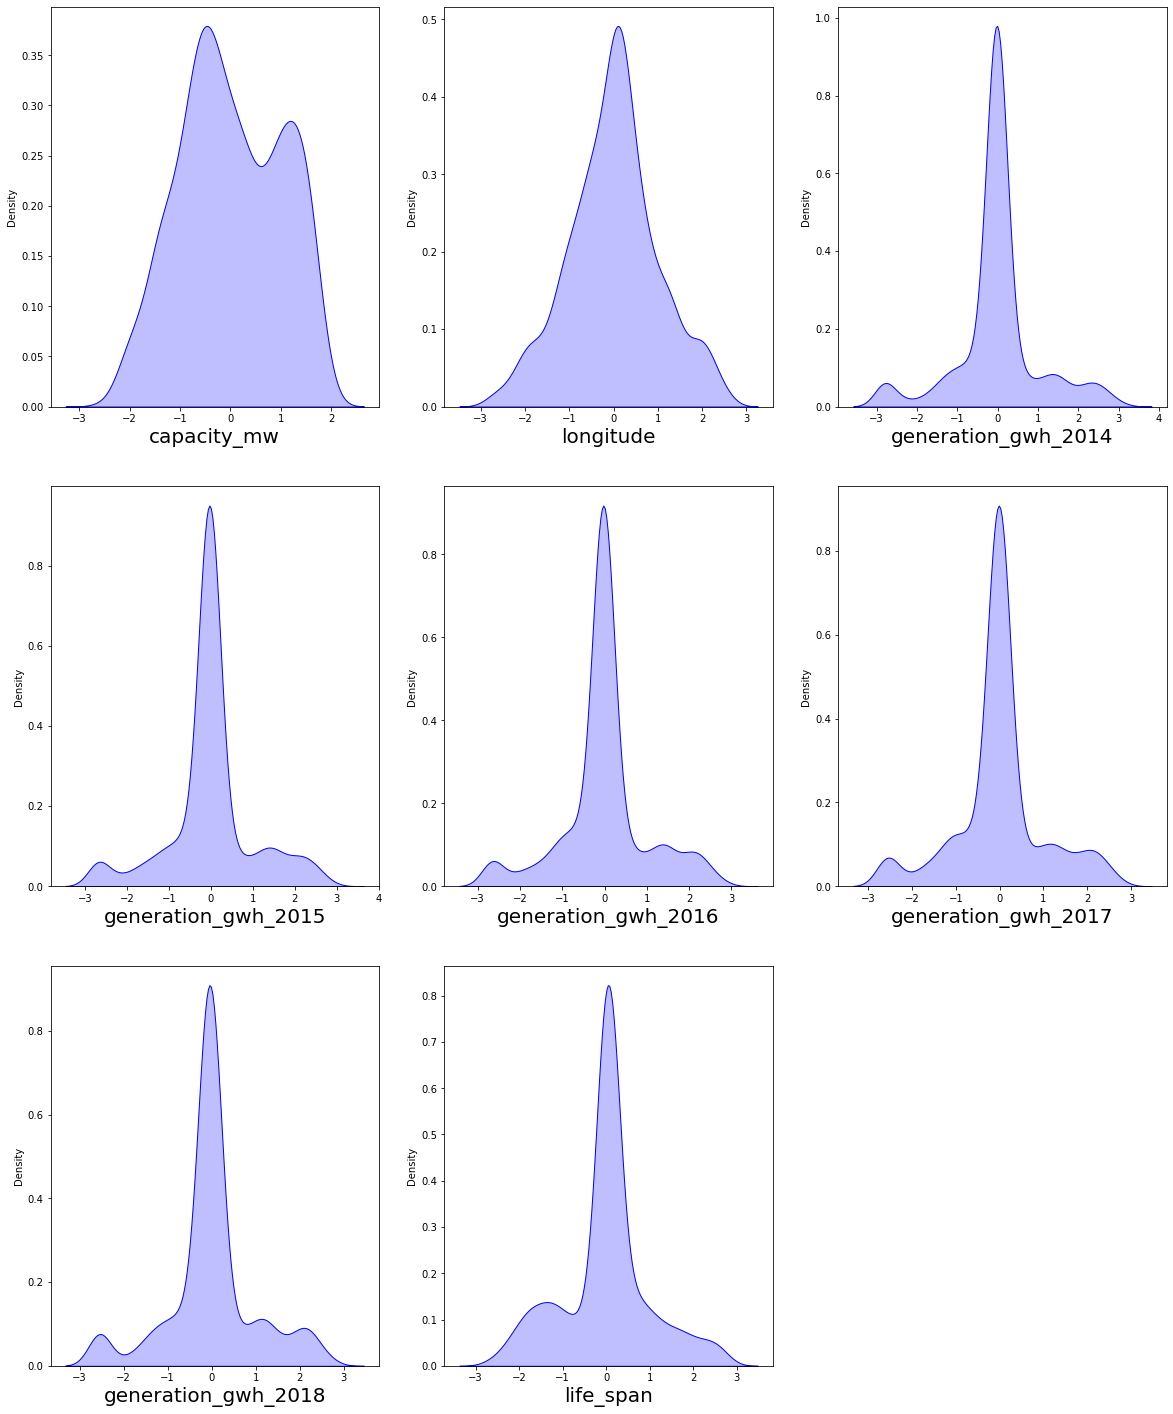

In [221]:
# Visualizing the skewness in data.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skewness]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks nearly normally distributed.

In [222]:
# Scaling the data using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,-1.701898,-0.922017,1.397951,-1.036523,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,-1.081020
1,0.233905,-0.499918,2.821796,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
2,-0.261274,-2.377241,-0.529717,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
3,0.403486,2.431134,-0.507812,0.407145,-0.248311,0.115295,0.126395,-0.182844,-0.175070,-0.246886
4,1.706512,1.262067,-0.507812,0.407145,1.401471,2.206732,2.200474,1.934237,2.267368,-1.755881
...,...,...,...,...,...,...,...,...,...,...
846,1.649790,0.231811,-0.507812,0.407145,-0.020355,-2.569453,-0.841019,0.028976,-0.106235,-1.977631
847,-1.619557,0.421491,0.696980,-2.480190,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
848,-0.497268,-0.224521,-0.529717,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
849,0.125480,-0.760666,0.302685,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011


In [223]:
# Checking the VIF factor again begore modep prediction.

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.779752,capacity_mw
1,1.193251,longitude
2,1.412154,source
3,1.595434,geolocation_source
4,3.465479,generation_gwh_2014
5,5.867596,generation_gwh_2015
6,9.562951,generation_gwh_2016
7,9.120470,generation_gwh_2017
8,8.521625,generation_gwh_2018
9,1.149086,life_span


In [231]:
# Converting x to X for model prediction.

X=x

In [232]:
X

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,life_span
0,-1.701898,-0.922017,1.397951,-1.036523,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,-1.081020
1,0.233905,-0.499918,2.821796,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
2,-0.261274,-2.377241,-0.529717,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
3,0.403486,2.431134,-0.507812,0.407145,-0.248311,0.115295,0.126395,-0.182844,-0.175070,-0.246886
4,1.706512,1.262067,-0.507812,0.407145,1.401471,2.206732,2.200474,1.934237,2.267368,-1.755881
...,...,...,...,...,...,...,...,...,...,...
846,1.649790,0.231811,-0.507812,0.407145,-0.020355,-2.569453,-0.841019,0.028976,-0.106235,-1.977631
847,-1.619557,0.421491,0.696980,-2.480190,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
848,-0.497268,-0.224521,-0.529717,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011
849,0.125480,-0.760666,0.302685,0.407145,-0.020355,-0.027686,-0.025372,-0.017174,-0.036886,0.045011


In [233]:
# Converting y to Y for model prediction.

Y=y

In [234]:
Y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 851, dtype: int32

# Spliting the data into train and test

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [236]:
# Finding the best random state.

maxAccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.20, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,Y_train)
    pred=rf.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.8888888888888888  on Random_state  127


In [237]:
# Applying the best random_state as 127 and test_size as 0.20 to get best accuracy score.

x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=127)


In [239]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [240]:
# defining a function to run all the classifiers.

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=127) 
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

# Logistic Regression

In [241]:
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 73.68421052631578

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.72      0.80      0.76        45
           2       0.67      0.20      0.31        10
           3       0.58      0.69      0.63        42
           5       1.00      0.50      0.67         2
           6       1.00      0.97      0.99        35
           7       0.71      0.63      0.67        27

    accuracy                           0.74       171
   macro avg       0.78      0.64      0.68       171
weighted avg       0.74      0.74      0.73       171

Cross Validation Score: 67.68833849329205

Accuracy Score - Cross Validation Score is 5.99587203302373


# Decision Tree Classifier

In [242]:
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 85.38011695906432

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.84      0.80      0.82        45
           2       0.36      0.40      0.38        10
           3       0.84      0.86      0.85        42
           5       0.33      0.50      0.40         2
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        27

    accuracy                           0.85       171
   macro avg       0.74      0.75      0.74       171
weighted avg       0.86      0.85      0.86       171

Cross Validation Score: 79.90574475404196

Accuracy Score - Cross Validation Score is 5.474372205022362


# KNeighbors Classifier

In [243]:
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 83.04093567251462

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.79      0.84      0.82        45
           2       0.50      0.20      0.29        10
           3       0.83      0.81      0.82        42
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        35
           7       0.79      1.00      0.89        27

    accuracy                           0.83       171
   macro avg       0.67      0.64      0.64       171
weighted avg       0.82      0.83      0.82       171

Cross Validation Score: 74.85861713106294

Accuracy Score - Cross Validation Score is 8.182318541451679


# SGD Classifier

In [244]:
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 72.51461988304094

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.74      0.76      0.75        45
           2       0.36      0.40      0.38        10
           3       0.74      0.55      0.63        42
           5       0.20      0.50      0.29         2
           6       1.00      1.00      1.00        35
           7       0.64      0.93      0.76        27

    accuracy                           0.73       171
   macro avg       0.60      0.62      0.58       171
weighted avg       0.74      0.73      0.72       171

Cross Validation Score: 63.10560715514276

Accuracy Score - Cross Validation Score is 9.409012727898173


# Random Forest Classifier

In [246]:
model = RandomForestClassifier()
classifier(model, X, Y)

Accuracy Score: 88.30409356725146

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.83      0.87      0.85        45
           2       0.67      0.40      0.50        10
           3       0.82      0.88      0.85        42
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        27

    accuracy                           0.88       171
   macro avg       0.82      0.78      0.79       171
weighted avg       0.88      0.88      0.88       171

Cross Validation Score: 82.25799793601651

Accuracy Score - Cross Validation Score is 6.046095631234948


# Extra Tree Classifier

In [247]:
model = ExtraTreesClassifier()
classifier(model, X, Y)

Accuracy Score: 88.30409356725146

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.82      0.89      0.85        45
           2       0.57      0.40      0.47        10
           3       0.86      0.90      0.88        42
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        27

    accuracy                           0.88       171
   macro avg       0.80      0.76      0.77       171
weighted avg       0.88      0.88      0.88       171

Cross Validation Score: 82.02270381836945

Accuracy Score - Cross Validation Score is 6.281389748882006


Comparing all above algorithms, the Extra Trees Regressor gives the best results as the difference between R2 Score & Cross Validation Score are least along with least difference in Cross Validation Score and the highest R2 score as compared to all other models.

Thats why we are choosing ExtraTreesRegressor as our best fit model and we will do hyperparameter tunning for it.

# Hyper parameter tunning

In [248]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=127)


In [250]:
# Hyperparameter tunning using list GridSearchCV

params = {'criterion' : ['gini', 'entropy','log_loss'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth':[4,8,16,20],
              'n_jobs' : [6,12,18]}

In [251]:
GCV = GridSearchCV(ExtraTreesClassifier(), params, cv=5)

In [252]:
# Model Training. 

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 8, 16, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [6, 12, 18]})

In [254]:
# Best Parameters

GCV.best_params_ 

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_jobs': 6}

In [255]:
# Predicting final model using best parameters.

final_model = ExtraTreesClassifier(criterion = 'gini', max_features = 'sqrt', n_jobs = 6, max_depth=20)   

In [256]:
final_fit = final_model.fit(x_train,y_train)

In [257]:
final_pred = final_model.predict(x_test)

In [258]:
# Final model accuracy score.

accu_score = (accuracy_score(y_test, final_pred))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", accu_score)

The Accuracy Score for the Best Model is  88.88888888888889


In [259]:
# Final model Cross Validation Score

final_cv_score = (cross_val_score(final_model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 82.14035087719299


In [262]:
# Final model Classification Report and confusion matrix.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test,final_pred))
final_class_report = classification_report(y_test, final_pred)
print("\nClassification Report:\n", final_class_report)

[[ 7  3  0  0  0  0  0]
 [ 1 40  1  2  0  0  1]
 [ 0  1  4  4  1  0  0]
 [ 0  3  0 38  0  0  1]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.85      0.89      0.87        45
           2       0.67      0.40      0.50        10
           3       0.86      0.90      0.88        42
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00        35
           7       0.93      1.00      0.96        27

    accuracy                           0.89       171
   macro avg       0.81      0.77      0.79       171
weighted avg       0.88      0.89      0.88       171



Here we found the best fit model after EDA,Data cleaning and applying different algorithms to the data.

# Saving the model

In [269]:
import pickle
filename = 'Global_Power_Plant_Project(primary_fuel.pkl'
pickle.dump(final_model, open(filename, 'wb'))